In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Dimensions of the problem
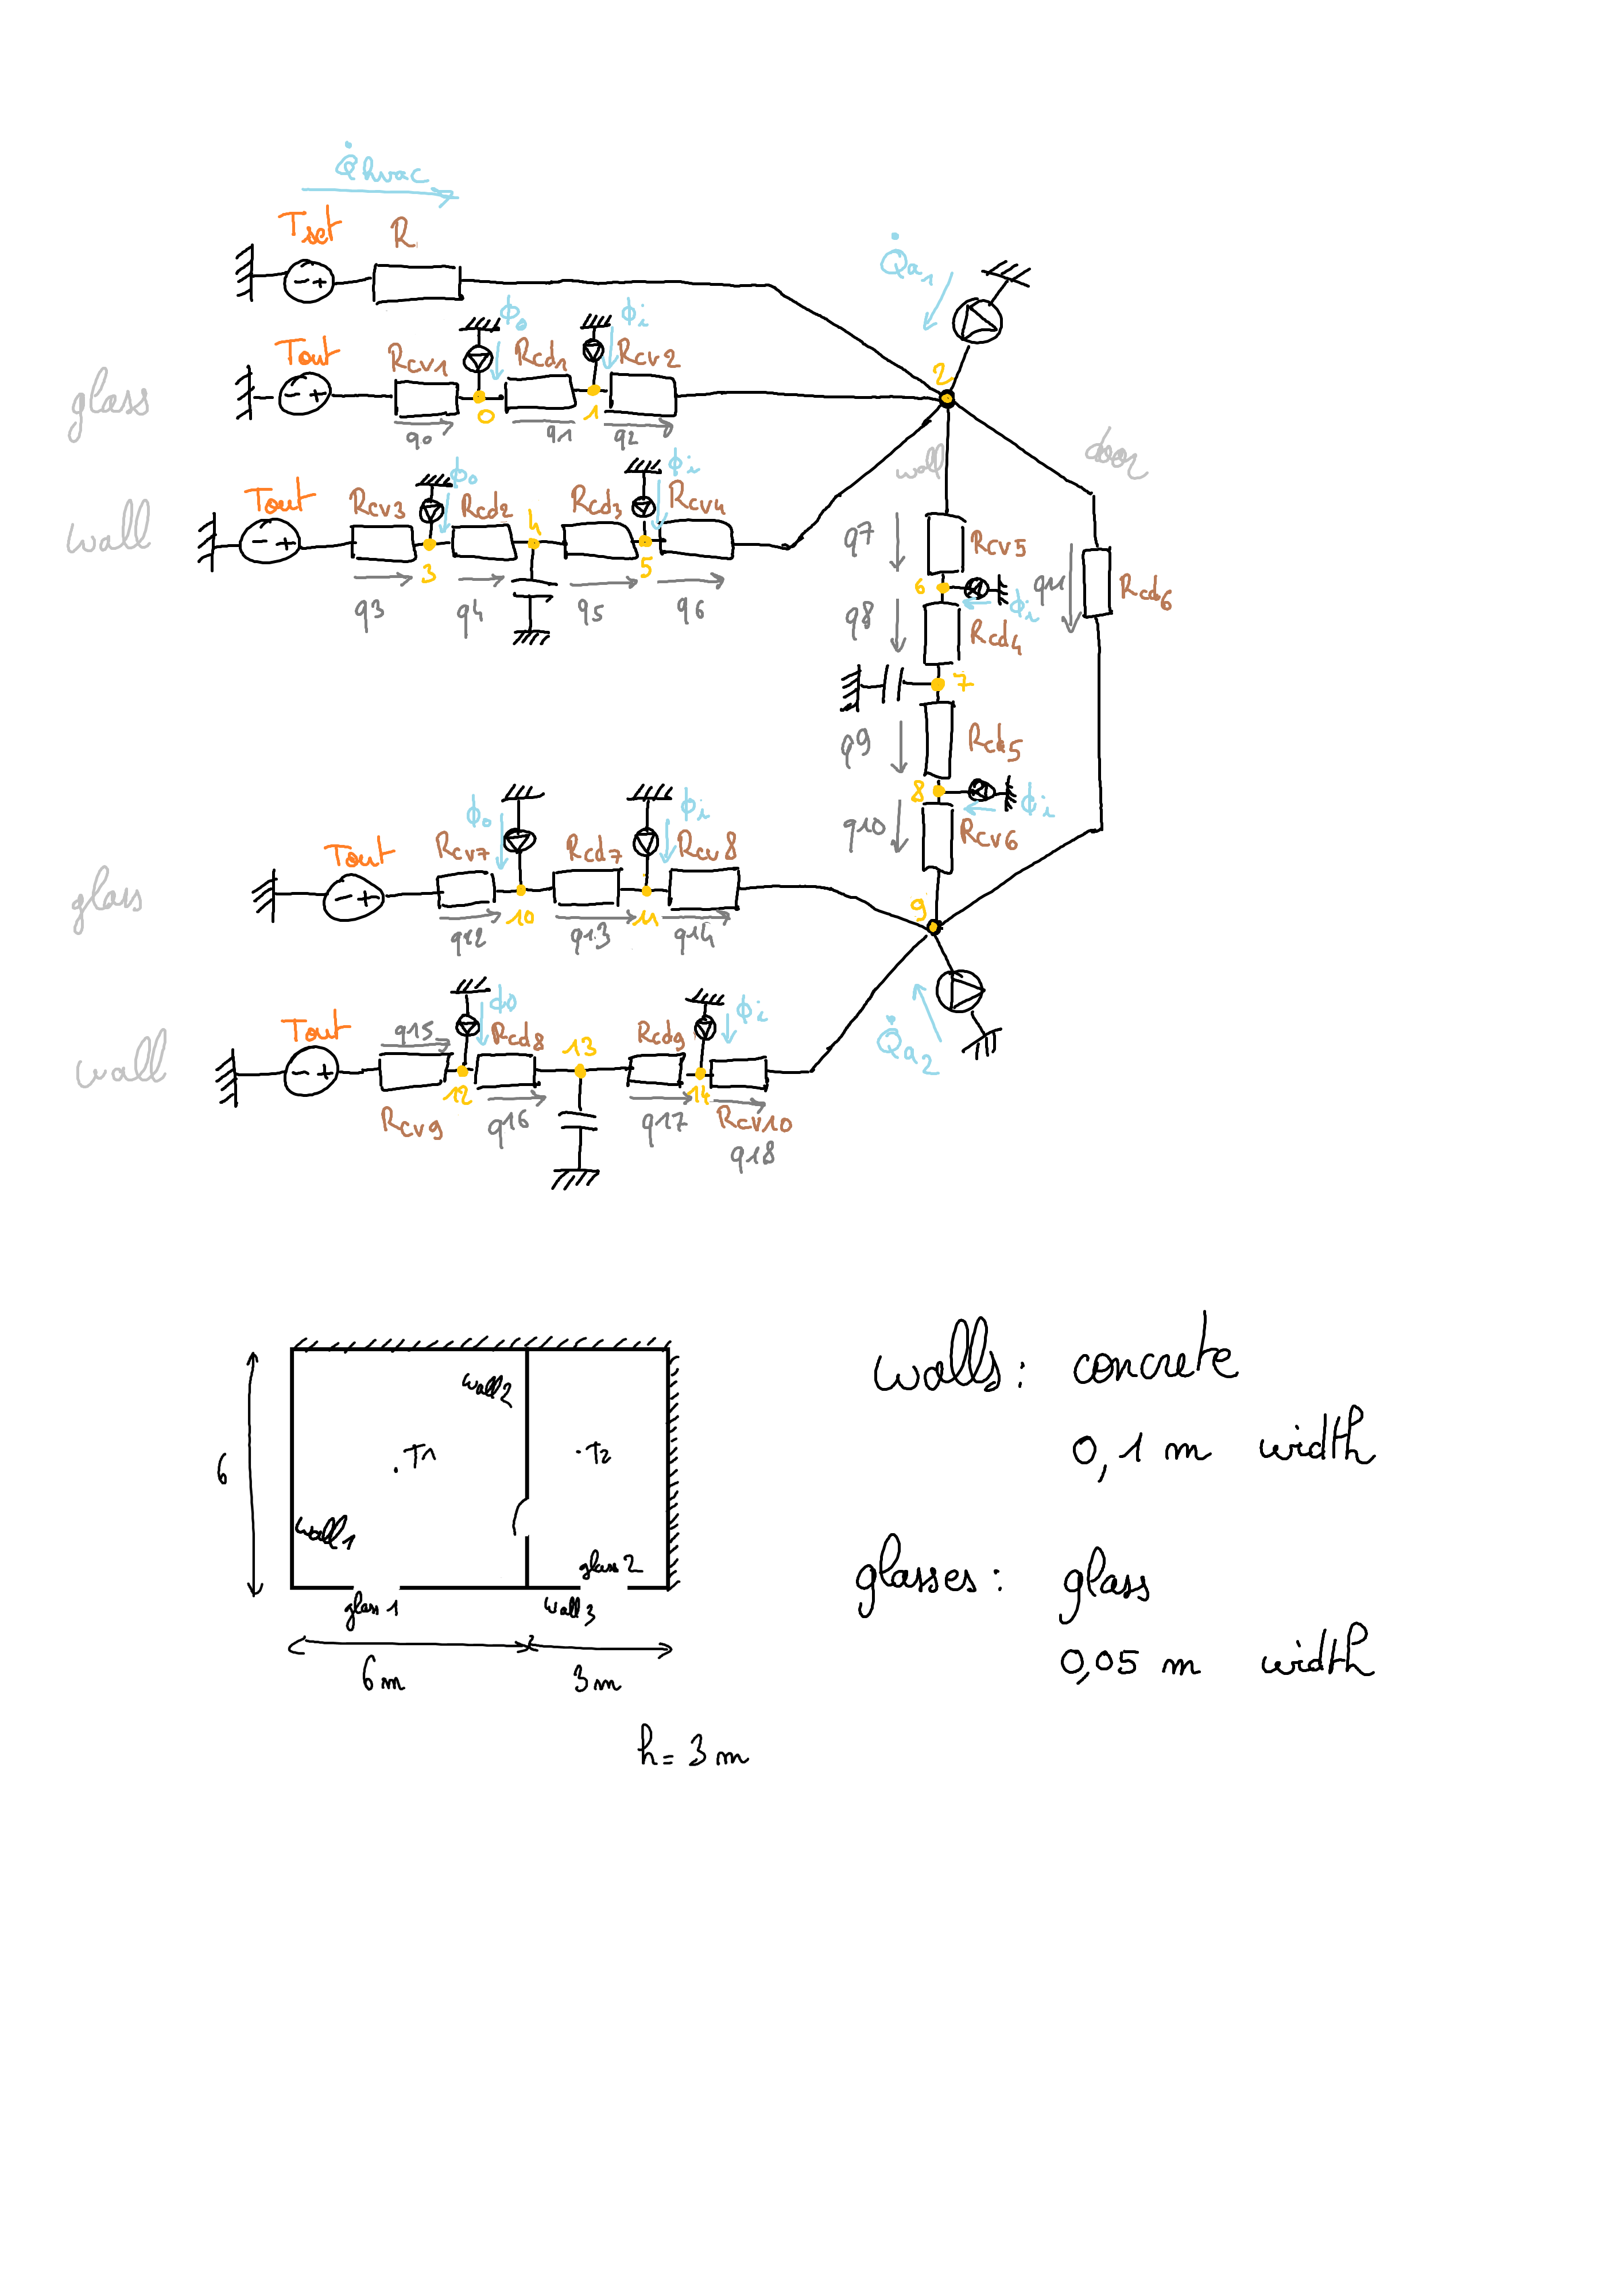

In [140]:
H = 3 #height of the room
L_1 = 12
L_2 = 6 
L_3 = 3 
L_g = 1 

L_door = 1
H_door = 2

S_glass = L_g**2
S_door = L_door * H_door
S_wall1 = L_1*H
S_wall2 = L_2*H
S_wall3 = L_3*H

print(S_wall1, S_wall2, S_wall3)

36 18 9


Thermal properties of the model

In [141]:
air = {'Density': 1.2,                      # kg/m³
       'Specific heat': 1000}               # J/(kg·K)
# pd.DataFrame.from_dict(air, orient='index', columns=['air'])
pd.DataFrame(air, index=['Air'])

,Density,Specific heat
Air,1.2,1000


In [142]:
concrete = {'Conductivity': 1.400,
            'Density': 2300.0,
            'Specific heat': 880,
            'Width': 0.1}


glass = {'Conductivity': 1,
         'Density': 2500,
         'Specific heat': 1210,
         'Width': 0.05}

wood = {'Conductivity': 0.17,
         'Density': 500,
         'Specific heat': 2500,
         'Width': 0.07}

wall = pd.DataFrame.from_dict({'Wall': concrete,
                               'Glass': glass},
                              orient='index')
wall

,Conductivity,Density,Specific heat,Width
Wall,1.4,2300.0,880,0.10
Glass,1.0,2500.0,1210,0.05


Radiative properties

In [143]:
# radiative properties
ε_wLW = 0.85    # long wave emmisivity: wall surface (concrete)
ε_gLW = 0.90    # long wave emmisivity: glass pyrex
α_wSW = 0.25    # short wave absortivity: white smooth surface
α_gSW = 0.38    # short wave absortivity: reflective blue glass
τ_gSW = 0.30    # short wave transmitance: reflective blue glass

σ = 5.67e-8     # W/(m²⋅K⁴) Stefan-Bolzmann constant
print(f'σ = {σ} W/(m²⋅K⁴)')

σ = 5.67e-08 W/(m²⋅K⁴)


Convection coefficients

In [144]:
convection_coeff = {'h_in': 4,
                    'h_out': 10}


Conductances for conduction

In [145]:
G_cd1 = (glass['Conductivity']*S_glass)/glass['Width']

G_cd2 = G_cd3 = ((concrete['Conductivity']*S_wall1)/concrete['Width'])*0.5
G_cd4 = G_cd5 = ((concrete['Conductivity']*S_wall2)/concrete['Width'])*0.5

G_cd6 = ((wood['Conductivity']*S_door)/wood['Width'])

G_cd9 = G_cd8 = ((concrete['Conductivity']*S_wall3)/concrete['Width'])*0.5

G_cd7 = (glass['Conductivity']*S_glass)/glass['Width']

Conductances for convection

In [146]:
G_cv1 = S_glass * convection_coeff['h_out']
G_cv2 = S_glass * convection_coeff['h_in']

G_cv3 = S_wall1 * convection_coeff['h_out']
G_cv4 = S_wall1 * convection_coeff['h_in']

G_cv5 = G_cv6 = S_wall2 * convection_coeff['h_in']

G_cv7 = S_glass * convection_coeff['h_out']
G_cv8 = S_glass * convection_coeff['h_in']

G_cv9 = S_wall3 * convection_coeff['h_out']
G_cv10 = S_wall3 * convection_coeff['h_in']

Conductances for Advection

In [147]:
Va_1 = (L_2**2) * H  #volume of air in room 1 
Va_2 = L_2 * L_3 * H #volume of air in room 2 
ACH = 1 # 1 volume changed per hour

G_adv1 = air['Specific heat'] * air['Density'] * ((ACH * Va_1)/3600)
G_adv2 = air['Specific heat'] * air['Density'] * ((ACH * Va_2)/3600)

Wall Capacities

In [148]:
C_wall1 = S_wall1 * concrete['Density'] * concrete['Width'] * concrete['Specific heat']
C_wall2 = S_wall2 * concrete['Density'] * concrete['Width'] * concrete['Specific heat']
C_wall3 = S_wall3 * concrete['Density'] * concrete['Width'] * concrete['Specific heat']

Index Matrix A

In [149]:
N_nodes = 15
N_flows = 20

A = np.zeros([N_flows,N_nodes])

A[0,0] = A[1,1] = A[2,2] = A[3,3] = A[4,4] = A[5,5] = A[7,6] = A[8,7] = A[9,8] = A[10,9] = A[11,9] = A[12,10] = A[13,11] = A[15,12] = A[16,13] = A[17,14] = A[6,2] = A[19,2] = A[14,9] = A[18,9] = 1
A[1,0] = A[2,1] =  A[4,3] = A[5,4] = A[6,5] = A[7,2] = A[8,6] = A[9,7] = A[10,8] = A[11,2] = A[13,10] = A[14,11] = A[16,12] = A[17,13] = A[18,14] = -1
print (A)

[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]

 [-1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]

 [ 0. -1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]

 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]

 [ 0.  0.  0. -1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]

 [ 0.  0.  0.  0. -1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]

 [ 0.  0.  1.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]

 [ 0.  0. -1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]

 [ 0.  0.  0.  0.  0.  0. -1.  1.  0.  0.  0.  0.  0.  0.  0.]

 [ 0.  0.  0.  0.  0.  0.  0. -1.  1.  0.  0.  0.  0.  0.  0.]

 [ 0.  0.  0.  0.  0.  0.  0.  0. -1.  1.  0.  0.  0.  0.  0.]

 [ 0.  0. -1.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]

 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]

 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  1.  0.  0.  0.]

 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0. -1.  0.  0.  0.]

 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0

Conductance Matrix G

In [150]:
G = np.zeros([N_flows,N_flows])

G[0,0] = G_cv1
G[1,1] = G_cd1
G[2,2] = G_cv2
G[3,3] = G_cv3
G[4,4] = G_cd2
G[5,5] = G_cd3
G[6,6] = G_cv4
G[7,7] = G_cv5
G[8,8] = G_cd4
G[9,9] = G_cd5
G[10,10] = G_cv6
G[11,11] = G_cd6
G[12,12] = G_cv7
G[13,13] = G_cd7
G[14,14] = G_cv8
G[15,15] = G_cv9
G[16,16] = G_cd8
G[17,17] = G_cd9
G[18,18] = G_cv10
G[19,19] = G_0 = 10**6 #supposed infinite for the moment

Capacity Matrix C

In [151]:
C = np.zeros([N_nodes, N_nodes])

C[4,4] = C_wall1
C[7,7] = C_wall2
C[13,13] = C_wall3

Flow matrix f

In [152]:
phi_out , phi_in= 0 , 0 #No internal sources of light and we are at night
Q_a1 = Q_a2 = 80 #1 person in each room
Q_hvac = α_wSW * 1000 * (S_wall3+S_wall1+S_wall2)
f = np.zeros([N_nodes,1])
f[0] = f[3] = f[10] = f[12] = phi_out
f[1] = f[5] = f[6] = f[8] = f[11] = f[14] = phi_in
f[2] = Q_a1 + Q_hvac
f[9] = Q_a2

Temperature source vector b 

In [153]:
b = np.zeros([N_flows, 1])
T_out = 4 
T_sp = 19

b[[0, 3, 12, 15]] = T_out
b[19] = T_sp

Output vector y

In [154]:
y = np.zeros(N_nodes)         # nodes
y[[2, 9]] = 1              # nodes (temperatures) of interest
print(f'y = ', y)

y =  [0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


Steady State Solution

In [155]:
θ = np.linalg.inv(A.T @ G @ A) @ (A.T @ G @ b + f)
print(f'θ = {θ} °C')

"""b[[0, 3, 12, 15]] = 1
θ_steady_To = np.linalg.inv(A.T @ G @ A) @ (A.T @ G @ b + f)
np.set_printoptions(precision=3)
print('When To = 1°C, the temperatures in steady-state are:', θ_steady_To, '°C')

print(f'The indoor temperature is: {θ_steady_To[-1]:.3f} °C')
"""
print()

θ = [[ 7.754]

 [ 9.631]

 [19.015]

 [ 6.362]

 [ 9.736]

 [13.11 ]

 [17.796]

 [17.1  ]

 [16.404]

 [15.186]

 [ 6.796]

 [ 8.195]

 [ 5.76 ]

 [ 8.273]

 [10.787]] °C




State space representation 

In [156]:
As = -np.linalg.inv(C) @ A.T @ G @ A
pd.set_option('precision', 1)
pd.DataFrame(As)

Bs = np.linalg.inv(C) @ np.block([A.T @ G, np.eye(N_nodes)])
pd.set_option('precision', 2)
pd.DataFrame(Bs)

LinAlgError: Singular matrix